# Poisson Regression Models
A concise reference is chapter 4 in 
https://data.princeton.edu/wws509/notes/#, but it is worth looking further to get a more complete picture. Out-of-the-box, a Poisson regression assumes the following:

- The error has Poisson distribution, and not a normal distribution as in OLS
- The data is strictly positive.
- The data is skewed.
- The data has discrete distribution (but can be generalized to continuous non-negative)
- Given a log linear model: The dependent variable $(Y)$ is not a linear function of the coefficients. Rather, $ln(Y)$ is a linear function of the coefficients.
- The Poisson distribution does not have separate parameters for the mean and the variance, specifically $\mu = \sigma$. That implies that the distribution of the data is heteroskedastic, where higher counts also fluctuate more widely.

Poisson regression models are hence a natural choice for count data. For example, the number of V2 rocket strikes in different areas of London, the number of children a woman has, etc. The underlying assumption is that counts correspond to independent events, and the probability of two simultaneous events is negligible. 


Specifically, the likelihood of observing a value $y$ is assumed to follow a Poisson distribution:

\begin{equation}
p(y|\mu) = \frac{e^{-\mu} \mu^{y}}{y!}
\end{equation}

Where the only parameter, $\mu$, is both the mean and the variance of the Poisson distribution. The model acquires additional structure when $\mu$ is assumed to be a function of some explanatory variables, $x$, i.e. $\mu = f(x)$. The canonical Poisson regression uses a log-linear relationship between the coefficients and the mean, i.e. $\mu = e^{\mathbf{\beta \cdot x}}$. The result is a generalized linear model with Poisson error and link log.


## Analogy to Least Squares Regression
To anchor intuition in familiar territory, consider least squares regression with a log-linear relationship between endogenous and exogenous variables (that is, the model assumes $log(y)=a + \mathbf{bx}$ that is beset with Gaussian noise). The familiar form for the model is:

\begin{equation}
\begin{array}{rl}
y &= a\exp{\mathbf{b \cdot x}} + \epsilon \\
&= \exp\mathbf{\beta \cdot x} + \epsilon
\end{array}
\end{equation}

Where the constant $a$ was absorbed into the coefficient vector $\mathbf{\beta}$ in the second line, and $\mathbf{x} \rightarrow [1,\mathbf{x}]$. $\epsilon$ is an error term that is assumed to have normal distribution with zero mean, i.e. $\epsilon \sim \mathscr{N}(0,\sigma)$. It's a bit unnatural, but this can be rewritten, absorbing the parameters into the random term:

\begin{equation}
y = 0 + \epsilon'
\end{equation}

With $\epsilon' \sim \mathscr{N}(\mu = \exp{\mathbf{\beta \cdot x}},\sigma)$. Now what if the fluctuations aren't normally distributed about the mean, but they are Poisson distributed about the mean? In that case, $\epsilon' \sim \mathrm{Poisson}(\mu = \exp{\mathbf{\beta \cdot x}})$. 

## Standard Implementation

A model where a linear relationship of the mean of the count to the exogenous variable is justified, and the noise has Poisson distribution. 

Text(0.5, 1.0, 'residuals')

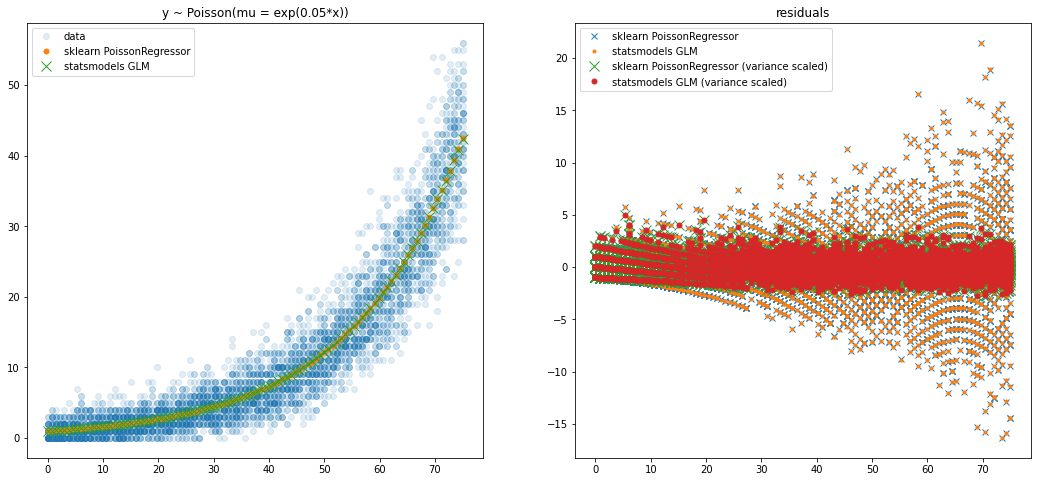

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import PoissonRegressor


"""
Generate Data; Linear Case
"""
beta_true = 0.05

def get_samples(x,n_samples):
    mu = np.exp(beta_true*x)
    return np.random.poisson(lam=mu,size=n_samples)#np.random.randint(low=0,high=n_samples,size=1))

xv = np.linspace(0,75,100)
data = []
for x in xv: 
    data += [[x,y] for y in get_samples(x,50)]
data = np.array(data)


"""
Poisson Regressor
"""
reg1 = PoissonRegressor().fit(data[:,0].reshape(-1,1),data[:,1])
reg2 = sm.GLM(exog=data[:,0],endog=data[:,1],family=sm.families.Poisson()).fit()



fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(data[:,0],data[:,1],alpha=0.125,marker='o',linestyle='')
ax1.plot(xv,reg1.predict(xv.reshape(-1,1)),'.',markersize=10)
ax1.plot(xv,reg2.predict(xv.reshape(-1,1)),'x',markersize=10)
ax1.legend(['data','sklearn PoissonRegressor','statsmodels GLM'])
ax1.set_title('y ~ Poisson(mu = exp(0.05*x))')


res1 = data[:,1]-reg1.predict(data[:,0].reshape(-1,1))
res2 = data[:,1]-reg2.predict(data[:,0].reshape(-1,1))
res1sc = res1/np.sqrt(reg1.predict(data[:,0].reshape(-1,1)))
res2sc = res2/np.sqrt(reg2.predict(data[:,0].reshape(-1,1))) 
ax2.plot(data[:,0],res1,'x')
ax2.plot(data[:,0],res2,'.')
ax2.plot(data[:,0],res1sc,'x',markersize=10)
ax2.plot(data[:,0],res2sc,'.',markersize=10)
ax2.legend(['sklearn PoissonRegressor','statsmodels GLM','sklearn PoissonRegressor (variance scaled)','statsmodels GLM (variance scaled)'])
ax2.set_title('residuals')